<a href="https://colab.research.google.com/github/Gabriele90/Biohacker90/blob/main/ROC_curves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Machine Learning in Python: Making Receiver Operating Characteristic (ROC) curve**

The ROC curve summarizes the prediction performance of a classification model at all classification thresholds. Particularly, the ROC curve plots the False Positive Rate (FPR) on the X-axis and the True Positive Rate (TPR) on the Y-axis.



**Generate synthetic dataset**

In [5]:
from sklearn.datasets import make_classification

In [6]:
X, Y = make_classification(n_samples=1000, n_classes=2, n_features=8, random_state=0)

**Adding noisy features to make the problem more difficult**

In [7]:
import numpy as np

In [8]:
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]


**Data splitting**

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2,
                                                    random_state=0)


**Building 2 classification models**

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier


**Random Forest**

In [12]:
rf = RandomForestClassifier(max_features=5, n_estimators=500)
rf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

**Naive Bayes**

In [13]:
nb = GaussianNB()
nb.fit(X_train, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [14]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

**Prediction probabilities**

In [15]:
r_probs = [0 for _ in range(len(Y_test))]
rf_probs = rf.predict_proba(X_test)
nb_probs = nb.predict_proba(X_test)
knn_probs = knn.predict_proba(X_test)


Probabilities for the positive outcome is kept.

In [16]:
rf_probs = rf_probs[:, 1]
nb_probs = nb_probs[:, 1]
knn_probs = knn_probs[:, 1]

**Computing AUROC and ROC curve values**

In [17]:
from sklearn.metrics import roc_curve, roc_auc_score

**Calculate AUROC**

ROC is the receiver operating characteristic AUROC is the area under the ROC curve

In [18]:
r_auc = roc_auc_score(Y_test, r_probs)
rf_auc = roc_auc_score(Y_test, rf_probs)
nb_auc = roc_auc_score(Y_test, nb_probs)
knn_auc = roc_auc_score(Y_test, knn_probs)

**Print AUROC scores**

In [19]:
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Random Forest: AUROC = %.3f' % (rf_auc))
print('Naive Bayes: AUROC = %.3f' % (nb_auc))
print('K Nearest Neighbors: AUROC = %.3f' % (knn_auc))

Random (chance) Prediction: AUROC = 0.500
Random Forest: AUROC = 0.901
Naive Bayes: AUROC = 0.943
K Nearest Neighbors: AUROC = 0.725


**Calculate ROC curve**

In [20]:
r_fpr, r_tpr, _ = roc_curve(Y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(Y_test, rf_probs)
nb_fpr, nb_tpr, _ = roc_curve(Y_test, nb_probs)
knn_fpr, knn_tpr, _ = roc_curve(Y_test, knn_probs)

In [21]:
nb_fpr, nb_tpr

(array([0.        , 0.        , 0.        , 0.00869565, 0.00869565,
        0.0173913 , 0.0173913 , 0.02608696, 0.02608696, 0.03478261,
        0.03478261, 0.04347826, 0.04347826, 0.05217391, 0.05217391,
        0.06086957, 0.06086957, 0.07826087, 0.07826087, 0.08695652,
        0.08695652, 0.09565217, 0.09565217, 0.10434783, 0.10434783,
        0.23478261, 0.23478261, 0.31304348, 0.31304348, 0.36521739,
        0.36521739, 0.55652174, 0.55652174, 0.67826087, 0.67826087,
        0.69565217, 0.69565217, 1.        ]),
 array([0.        , 0.01176471, 0.47058824, 0.47058824, 0.48235294,
        0.48235294, 0.56470588, 0.56470588, 0.63529412, 0.63529412,
        0.68235294, 0.68235294, 0.71764706, 0.71764706, 0.72941176,
        0.72941176, 0.77647059, 0.77647059, 0.81176471, 0.81176471,
        0.85882353, 0.85882353, 0.91764706, 0.91764706, 0.92941176,
        0.92941176, 0.94117647, 0.94117647, 0.95294118, 0.95294118,
        0.96470588, 0.96470588, 0.97647059, 0.97647059, 0.98823529,
  

In [22]:
knn_fpr, knn_tpr

(array([0.        , 0.02608696, 0.10434783, 0.39130435, 0.74782609,
        0.93913043, 1.        ]),
 array([0.        , 0.04705882, 0.31764706, 0.77647059, 0.95294118,
        0.97647059, 1.        ]))

**Plot the ROC curve**

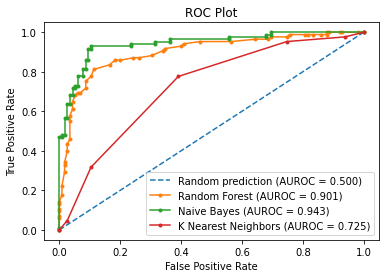

In [23]:
import matplotlib.pyplot as plt

plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes (AUROC = %0.3f)' % nb_auc)
plt.plot(knn_fpr, knn_tpr, marker='.', label='K Nearest Neighbors (AUROC = %0.3f)' % knn_auc)
plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend() 